<a href="https://colab.research.google.com/github/NikhitaB15/Plant_disease_detection/blob/main/Plant_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
random.seed(0)
import numpy as np
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(0)


In [ ]:
import os
import json
from zipfile import ZipFile


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models


data curation


In [ ]:
kaggle_credentials=json.load(open("kaggle.json"))

In [ ]:
os.environ['KAGGLE_USERNAME']=kaggle_credentials["username"]
os.environ['KAGGLE_KEY']=kaggle_credentials["key"]

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

100% 2.04G/2.04G [01:32<00:00, 23.6MB/s]
100% 2.04G/2.04G [01:32<00:00, 23.6MB/s]


In [ ]:
with ZipFile('/content/plantvillage-dataset.zip','r') as zip_ref:
  zip_ref.extractall()

In [ ]:
print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])




38
['Tomato___Target_Spot', 'Blueberry___healthy', 'Soybean___healthy', 'Potato___healthy', 'Apple___Black_rot']
38
['Tomato___Target_Spot', 'Blueberry___healthy', 'Soybean___healthy', 'Potato___healthy', 'Apple___Black_rot']
38
['Tomato___Target_Spot', 'Blueberry___healthy', 'Soybean___healthy', 'Potato___healthy', 'Apple___Black_rot']


In [ ]:
print(len(os.listdir("/content/plantvillage dataset/color/Grape___healthy")))
print(os.listdir("/content/plantvillage dataset/color/Grape___healthy")[0:5])


423
['7330e0f7-bc32-4297-95e6-a92c0cee1050___Mt.N.V_HL 6131.JPG', 'bd7f0429-550b-4e28-95af-98e56b282437___Mt.N.V_HL 6130.JPG', '18830d61-997d-438c-bd24-4dd427a45c4d___Mt.N.V_HL 6123.JPG', '05cff9d7-0f63-4b6e-9aa3-199cf9ffa64c___Mt.N.V_HL 9111.JPG', 'b2de09b2-4c5d-4be5-a06f-27419db0f696___Mt.N.V_HL 6097.JPG']


In [ ]:
base_dir='plantvillage dataset/color'

In [ ]:
img_size=224
batch_size=32

In [ ]:
data_gen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [ ]:
train_generator=data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [ ]:
validation_generator=data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


model building



In [ ]:
model=models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(img_size,img_size,3)))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(train_generator.num_classes,activation='softmax'))






In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 256)               4

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model training

In [ ]:
history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples// batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//batch_size
)

Epoch 1/5
1358/1358 [==============================] - 137s 97ms/step - loss: 0.9784 - accuracy: 0.7339 - val_loss: 0.5012 - val_accuracy: 0.8383
Epoch 2/5
1358/1358 [==============================] - 120s 88ms/step - loss: 0.2879 - accuracy: 0.9080 - val_loss: 0.4045 - val_accuracy: 0.8710
Epoch 3/5
1358/1358 [==============================] - 132s 97ms/step - loss: 0.1333 - accuracy: 0.9563 - val_loss: 0.4879 - val_accuracy: 0.8725
Epoch 4/5
1358/1358 [==============================] - 108s 80ms/step - loss: 0.0844 - accuracy: 0.9721 - val_loss: 0.4975 - val_accuracy: 0.8756
Epoch 5/5
1358/1358 [==============================] - 117s 86ms/step - loss: 0.0655 - accuracy: 0.9784 - val_loss: 0.6712 - val_accuracy: 0.8591


In [ ]:
print('Evaluating model..')
val_loss,val_accuracy=model.evaluate(validation_generator,steps=validation_generator.samples//batch_size)
print(f"Validation Accuracy:{val_accuracy*100:.2f}%")

Evaluating model..
339/339 [==============================] - 21s 63ms/step - loss: 0.6712 - accuracy: 0.8591
Validation Accuracy:85.91%


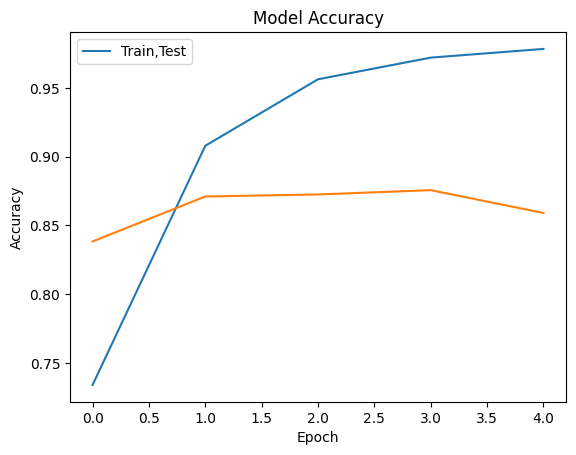

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train,Test'],loc='upper left')
plt.show()




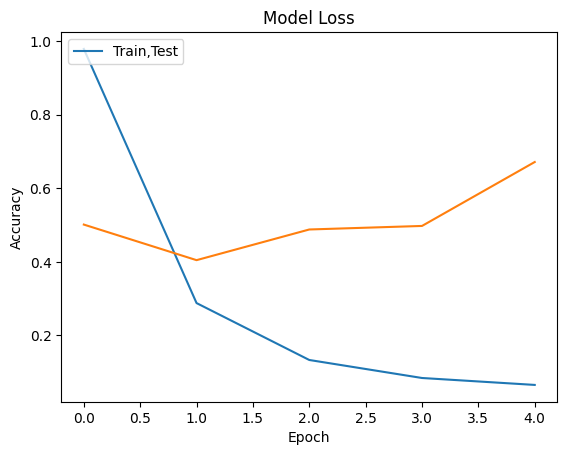

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train,Test'],loc='upper left')
plt.show()



Prediction System

In [ ]:
def load_and_preprocess(image_path,target_size=(224,224)):
  img=Image.open(image_path)
  img=img.resize(target_size)
  img_array=np.array(img)
  img_array=np.expand_dims(img_array,axis=0)
  img_array=img_array.astype('float32')/255.
  return img_array

In [ ]:
def predict_image_class(model,image_path,class_indices):
  preprocessed_img=load_and_preprocess(image_path)
  predictions=model.predict(preprocessed_img)
  predicted_class_index=np.argmax(predictions,axis=1)[0]
  predicted_class_name=class_indices[predicted_class_index]
  return predicted_class_name

In [ ]:
class_indices={v:k for k,v in train_generator.class_indices.items()}

In [ ]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
json.dump(class_indices,open('class_indices.json','w'))

In [ ]:
image_path='/content/test_apple_black_rot.JPG'
predicted_class_name=predict_image_class(model,image_path,class_indices)
print("Predicted class name",predicted_class_name)

1/1 [==============================] - 0s 270ms/step
Predicted class name Apple___Black_rot


In [33]:
model.save('drive/MyDrive/plant_disease_prediction_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
